In [1]:
import collections
import inspect
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import litholog
from litholog import utils, io, defaults

In [2]:
litholog.__file__, dir(litholog)

('/home/ross/code/python/projects/litholog/litholog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

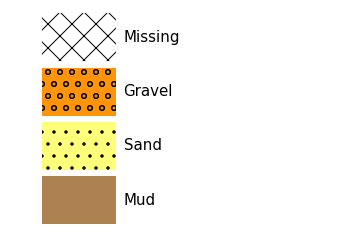

In [3]:
litholog.defaults.litholegend.plot()

# Load All Sequences

Here's a function (modified from `depstrat.data`) to load all the sequences as `BedSequence`s: 

In [4]:
# Set up some default args:

FPATH = '../data/AllBedsWithProfiles_CLEAN.csv'

# Columns to convert from strings to arrays
transforms = {c : utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}


# binary indicators
BINARY_FEATURES = ['snd', 'shl']


# bed data columns
FLOAT_FEATURES = [
    'th',
    'gs_tops_psi',
    'mean_gs_psi',
    'max_gs_psi',
    'grain_size_psi',
    'depth_m'
]

FEATURES = BINARY_FEATURES + FLOAT_FEATURES


# Sequence-level metadata
METACOLS = ['name', 'count', 'collection', 'eod', 'eodnum', 'ng', 'ar']


# Lithology component map
COMPONENT_MAP = ('max_gs_psi', lambda gs: defaults.gs2litho(gs, units='psi'))

In [5]:
def load_sequences(
    fpath=FPATH,
    resample=None,
    depth_col='depth_m',
    features=FEATURES,
    metacols=METACOLS,
    min_length=3
):
    """
    Load the dataset from saved csv. Return list of BedSequences.
    """
    df = pd.read_csv(fpath, converters=transforms)

    bed_seqs = []
    for name, grp in df.groupby('count'):
        seq = litholog.BedSequence.from_dataframe(
                grp,
                topcol='tops',
                basecol='bases',
                component_map=COMPONENT_MAP,
                datacols=features,
                metacols=metacols
        )
        if len(seq) >= min_length:
            bed_seqs.append(seq)

    # resample arrays if you want
    for seq in bed_seqs:
        if resample is not None:
            seq.resample_data(depth_col, resample)

    return bed_seqs

In [6]:
sequences = load_sequences()

# Check out a sequence

In [7]:
seq = random.choice(sequences)

seq

Striplog(50 Intervals, start=0.023551556749399797, stop=58.9581878246637)

In [8]:
seq.metadata

{'name': 'Annot Peira Cava 1',
 'count': 238,
 'collection': 'Annot',
 'eod': 'basin plain',
 'eodnum': 0,
 'ng': 0.700399815326943,
 'ar': 0.06}

In [9]:
seq.net_to_gross

0.6794317431378517

In [10]:
seq.amalgamation_ratio

0.0625

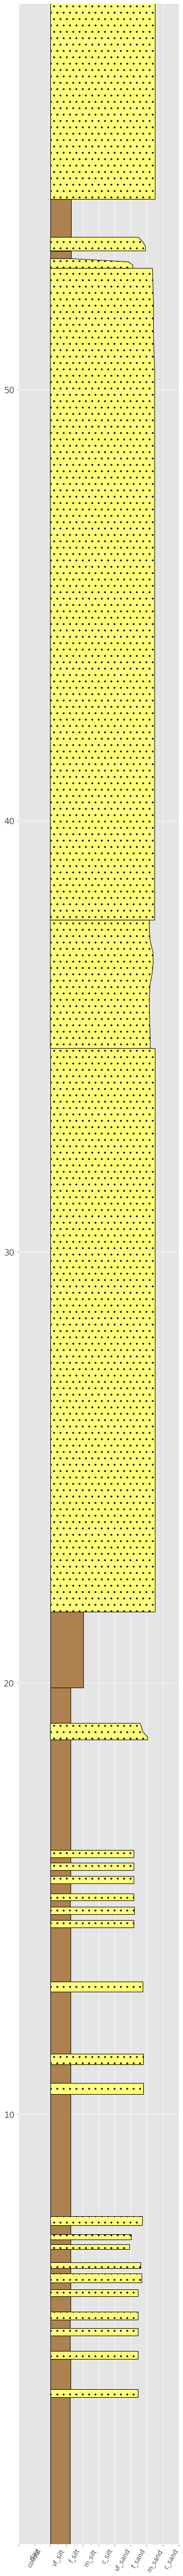

In [11]:
seq.plot(legend=defaults.litholegend, width_field='grain_size_psi', fig_width=7)

In [12]:
[print(bed, '\n') for bed in seq]

{'data': {'snd': 1.0, 'shl': -0.0, 'th': 4.5369018020661, 'gs_tops_psi': -1.5, 'mean_gs_psi': -1.5, 'max_gs_psi': -1.5, 'grain_size_psi': array([-1.4998, -1.4998, -1.4998, -1.4998, -1.4998, -1.4998, -1.4998,
       -1.4998, -1.4998, -1.4998, -1.4998, -1.4998, -1.4998, -1.4998,
       -1.4998]), 'depth_m': array([58.9582, 58.7264, 58.3432, 58.0134, 57.6301, 57.2557, 56.8101,
       56.3644, 56.0346, 55.687 , 55.2413, 54.9026, 54.7154, 54.555 ,
       54.4213])}, 'top': Position({'middle': 58.9581878246637, 'units': 'm'}), 'base': Position({'middle': 54.421286022597606, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'sand'})]} 

{'data': {'snd': 0.0, 'shl': 1.0, 'th': 0.8888325532181579, 'gs_tops_psi': -6.7121, 'mean_gs_psi': -6.7121, 'max_gs_psi': -6.7121, 'grain_size_psi': array([-6.7179, -6.7179]), 'depth_m': array([54.4213, 53.5325])}, 'top': Position({'middle': 54.4212860225976, 'units': 'm'}), 'base': Position({'middle': 53.53245346937943, 'units': 'm'}),

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
df = pd.read_csv(FPATH, converters=transforms)
df

,name,count,collection,eod,eodnum,tops,th,bases,gs_tops_mm,gs_tops_psi,...,max_gs_mm,max_gs_psi,ng,ar,depth_m,rel_depth_m,grain_size_mm,grain_size_psi,missing_tops,missing_sample
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.816840,0.310820,22.506020,0.115051,-3.1197,...,0.117046,-3.0948,0.520514,0.021978,"[22.8168, 22.703, 22.5337, 22.506]",[0. 0.1138 0.2831 0.3108],"[0.1151, 0.1157, 0.117, 0.117]","[-3.119, -3.1115, -3.0954, -3.0954]",0.0,0.0
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.506020,0.609310,21.896710,0.001000,-9.9658,...,0.001000,-9.9658,0.520514,0.021978,"[22.506, 21.8967]",[0. 0.6093],"[0.001, 0.001]","[-9.9658, -9.9658]",0.0,0.0
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.896710,0.104630,21.792080,0.125380,-2.9956,...,0.125380,-2.9956,0.520514,0.021978,"[21.8967, 21.7921]",[0. 0.1046],"[0.1254, 0.1254]","[-2.9954, -2.9954]",0.0,0.0
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.792080,0.116940,21.675140,0.001000,-9.9658,...,0.001000,-9.9658,0.520514,0.021978,"[21.7921, 21.6751]",[0. 0.117],"[0.001, 0.001]","[-9.9658, -9.9658]",0.0,0.0
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.675140,0.132320,21.542820,0.134306,-2.8964,...,0.160420,-2.6401,0.520514,0.021978,"[21.6751, 21.6351, 21.5674, 21.5428]",[0. 0.04 0.1077 0.1323],"[0.1343, 0.1447, 0.1604, 0.1604]","[-2.8965, -2.7889, -2.6403, -2.6403]",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,vaca2,455,Tres Pasos,slopechannel,2,0.409406,0.118391,0.291014,0.109374,-3.1927,...,0.293782,-1.7672,0.878687,0.312281,"[0.4094, 0.3967, 0.3803, 0.3701, 0.362, 0.3415...",[0. 0.0127 0.0291 0.0393 0.0474 0.0679 0.1...,"[0.1094, 0.113, 0.1195, 0.2392, 0.2834, 0.2923...","[-3.1923, -3.1456, -3.0649, -2.0637, -1.8191, ...",0.0,0.0
56911,vaca2,455,Tres Pasos,slopechannel,2,0.291014,0.036281,0.254733,0.007758,-7.0101,...,0.007758,-7.0101,0.878687,0.312281,"[0.291, 0.2547]",[0. 0.0363],"[0.0078, 0.0078]","[-7.0023, -7.0023]",0.0,0.0
56912,vaca2,455,Tres Pasos,slopechannel,2,0.254733,0.013281,0.241452,0.173454,-2.5274,...,0.173936,-2.5234,0.878687,0.312281,"[0.2547, 0.2435, 0.2415]",[0. 0.0112 0.0132],"[0.1735, 0.1739, 0.1739]","[-2.527, -2.5237, -2.5237]",0.0,0.0
56913,vaca2,455,Tres Pasos,slopechannel,2,0.241452,0.021091,0.220361,0.007722,-7.0168,...,0.007722,-7.0168,0.878687,0.312281,"[0.2415, 0.2204]",[0. 0.0211],"[0.0077, 0.0077]","[-7.0209, -7.0209]",0.0,0.0


In [14]:
seq_df = df[df.name == 'Annot Peira Cava 1']
seq_df

,name,count,collection,eod,eodnum,tops,th,bases,gs_tops_mm,gs_tops_psi,...,max_gs_mm,max_gs_psi,ng,ar,depth_m,rel_depth_m,grain_size_mm,grain_size_psi,missing_tops,missing_sample
23651,Annot Peira Cava 1,238,Annot,basin plain,0,58.958188,4.536902,54.421286,0.353553,-1.5000,...,0.353553,-1.5000,0.7004,0.06,"[58.9582, 58.7264, 58.3432, 58.0134, 57.6301, ...",[0. 0.2318 0.615 0.9448 1.3281 1.7025 2.1...,"[0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.353...","[-1.4998, -1.4998, -1.4998, -1.4998, -1.4998, ...",0.0,0.0
23652,Annot Peira Cava 1,238,Annot,basin plain,0,54.421286,0.888833,53.532453,0.009538,-6.7121,...,0.009538,-6.7121,0.7004,0.06,"[54.4213, 53.5325]",[0. 0.8888],"[0.0095, 0.0095]","[-6.7179, -6.7179]",0.0,0.0
23653,Annot Peira Cava 1,238,Annot,basin plain,0,53.532453,0.315473,53.216981,0.175547,-2.5101,...,0.237984,-2.0711,0.7004,0.06,"[53.5325, 53.3973, 53.3071, 53.217]",[0. 0.1352 0.2254 0.3155],"[0.1755, 0.2107, 0.238, 0.238]","[-2.5105, -2.2467, -2.071, -2.071]",0.0,0.0
23654,Annot Peira Cava 1,238,Annot,basin plain,0,53.216981,0.180270,53.036710,0.009484,-6.7203,...,0.009484,-6.7203,0.7004,0.06,"[53.217, 53.0367]",[0. 0.1803],"[0.0095, 0.0095]","[-6.7179, -6.7179]",0.0,0.0
23655,Annot Peira Cava 1,238,Annot,basin plain,0,53.036710,0.223962,52.812748,0.009843,-6.6666,...,0.137617,-2.8613,0.7004,0.06,"[53.0367, 52.9916, 52.9466, 52.8127]",[0. 0.0451 0.0901 0.224 ],"[0.0098, 0.1147, 0.1376, 0.1376]","[-6.673, -3.1241, -2.8614, -2.8614]",0.0,0.0
23656,Annot Peira Cava 1,238,Annot,basin plain,0,52.812748,15.117981,37.694768,0.321225,-1.6383,...,0.353553,-1.5000,0.7004,0.06,"[52.8127, 52.4959, 51.7974, 50.9411, 50.1749, ...",[ 0. 0.3168 1.0153 1.8716 2.6378 3.71...,"[0.3212, 0.336, 0.336, 0.3536, 0.3536, 0.3536,...","[-1.6385, -1.5735, -1.5735, -1.4998, -1.4998, ...",0.0,0.0
23657,Annot Peira Cava 1,238,Annot,basin plain,0,37.694768,2.974702,34.720065,0.281434,-1.8291,...,0.331593,-1.5925,0.7004,0.06,"[37.6948, 37.3499, 37.1739, 36.9188, 36.7372, ...",[0. 0.3449 0.5209 0.776 0.9576 1.164 1.4...,"[0.2814, 0.2814, 0.2916, 0.3287, 0.3316, 0.316...","[-1.8293, -1.8293, -1.7779, -1.6052, -1.5925, ...",0.0,0.0
23658,Annot Peira Cava 1,238,Annot,basin plain,0,34.720065,13.062823,21.657243,0.353553,-1.5000,...,0.353553,-1.5000,0.7004,0.06,"[34.7201, 34.2458, 33.0818, 31.9178, 30.8831, ...",[ 0. 0.4743 1.6383 2.8023 3.837 4.91...,"[0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.353...","[-1.4998, -1.4998, -1.4998, -1.4998, -1.4998, ...",0.0,0.0
23659,Annot Peira Cava 1,238,Annot,basin plain,0,21.657243,1.764343,19.892899,0.016000,-5.9658,...,0.016000,-5.9658,0.7004,0.06,"[21.65724277, 19.89289949]",[0. 1.7643],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
23660,Annot Peira Cava 1,238,Annot,basin plain,0,19.892899,0.826450,19.066450,0.009327,-6.7444,...,0.009327,-6.7444,0.7004,0.06,"[19.8929, 19.0664]",[0. 0.8265],"[0.0093, 0.0093]","[-6.7486, -6.7486]",0.0,0.0


In [15]:
df[df.missing_sample == 1]

,name,count,collection,eod,eodnum,tops,th,bases,gs_tops_mm,gs_tops_psi,...,max_gs_mm,max_gs_psi,ng,ar,depth_m,rel_depth_m,grain_size_mm,grain_size_psi,missing_tops,missing_sample
759,Marnoso 26,18,Marnoso-Arenacea,basin plain,0,15.579580,0.209230,15.370350,0.001000,-9.9658,...,0.0099,-6.6584,0.257467,0.0,"[15.5796, 15.4288, 15.4165, 15.398, 15.3704]",[0. 0.1508 0.1631 0.1816 0.2092],"[0.001, 0.001, 0.0087, 0.0099, 0.0099]","[-9.9658, -9.9658, -6.8448, -6.6584, -6.6584]",0.0,1.0
771,Marnoso 26,18,Marnoso-Arenacea,basin plain,0,11.474840,0.043070,11.431770,0.001000,-9.9658,...,0.0088,-6.8283,0.257467,0.0,"[11.4748, 11.4625, 11.4472, 11.4318]",[0. 0.0123 0.0276 0.043 ],"[0.001, 0.0011, 0.0088, 0.0088]","[-9.9658, -9.8283, -6.8283, -6.8283]",0.0,1.0
1055,Marnoso 42,25,Marnoso-Arenacea,basin plain,0,21.617680,0.430790,21.186890,0.001000,-9.9658,...,0.1095,-3.1910,0.060228,0.0,"[21.6177, 21.39, 21.3746, 21.3561, 21.2084, 21...",[0. 0.2277 0.2431 0.2616 0.4093 0.4308],"[0.001, 0.0084, 0.0092, 0.1077, 0.1095, 0.1095]","[-9.9658, -6.8954, -6.7642, -3.2149, -3.191, -...",0.0,1.0
1071,Marnoso 42,25,Marnoso-Arenacea,basin plain,0,15.715830,1.338540,14.377290,0.001000,-9.9658,...,0.1360,-2.8783,0.060228,0.0,"[15.7158, 15.5558, 15.4204, 15.285, 15.1035, 1...",[0. 0.16 0.2954 0.4308 0.6123 0.6308 0.7...,"[0.001, 0.001, 0.0011, 0.0084, 0.0087, 0.1114,...","[-9.9658, -9.9658, -9.8283, -6.8954, -6.8448, ...",0.0,1.0
1077,Marnoso 42,25,Marnoso-Arenacea,basin plain,0,11.570990,0.886210,10.684780,0.001000,-9.9658,...,0.1101,-3.1831,0.060228,0.0,"[11.571, 11.451, 11.4079, 11.3617, 11.254, 11....",[0. 0.12 0.1631 0.2093 0.317 0.4554 0.5...,"[0.001, 0.001, 0.0085, 0.0093, 0.0095, 0.0097,...","[-9.9658, -9.9658, -6.8783, -6.7486, -6.7179, ...",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,Bend 7 (3 inch),123,Nigeria,levee,3,4.157427,0.008941,4.166367,0.163171,-2.6155,...,0.1693,-2.5623,0.099432,0.0,"[4.1574, 4.1582, 4.1591, 4.1599, 4.1607, 4.161...",[0. 0.0008 0.0017 0.0025 0.0033 0.0041 0.0...,"[0.1632, 0.1632, 0.1647, 0.1647, 0.1662, 0.166...","[-2.6153, -2.6153, -2.6021, -2.6021, -2.589, -...",0.0,1.0
6134,Bend 7 (3 inch),123,Nigeria,levee,3,4.267966,0.003251,4.271217,0.001001,-9.9643,...,0.1740,-2.5228,0.099432,0.0,"[4.268, 4.268, 4.2688, 4.2696]",[0. 0. 0.0008 0.0016],"[0.001, 0.174, 0.001, 0.001]","[-9.9658, -2.5228, -9.9658, -9.9658]",0.0,1.0
6135,Bend 7 (3 inch),123,Nigeria,levee,3,4.271217,0.008941,4.280158,0.167742,-2.5757,...,0.1740,-2.5228,0.099432,0.0,"[4.2712, 4.272, 4.2728, 4.2737, 4.2745, 4.2753...",[0. 0.0008 0.0016 0.0025 0.0033 0.0041 0.0...,"[0.1677, 0.1677, 0.1677, 0.1693, 0.1693, 0.169...","[-2.576, -2.576, -2.576, -2.5623, -2.5623, -2....",0.0,1.0
6137,Bend 7 (3 inch),123,Nigeria,levee,3,4.285035,0.008128,4.293163,0.167742,-2.5757,...,0.1724,-2.5362,0.099432,0.0,"[4.285, 4.2858, 4.2867, 4.2875, 4.2883, 4.2891...",[0. 0.0008 0.0017 0.0025 0.0033 0.0041 0.0...,"[0.1677, 0.1677, 0.1677, 0.1693, 0.1693, 0.170...","[-2.576, -2.576, -2.576, -2.5623, -2.5623, -2....",0.0,1.0


In [16]:
df[df.missing_tops == 1]

,name,count,collection,eod,eodnum,tops,th,bases,gs_tops_mm,gs_tops_psi,...,max_gs_mm,max_gs_psi,ng,ar,depth_m,rel_depth_m,grain_size_mm,grain_size_psi,missing_tops,missing_sample
553,Marnoso G16,12,Marnoso-Arenacea,basin plain,0,14.484542,0.241998,14.242545,0.016,-5.9658,...,0.016,-5.9658,0.452535,0.000000,"[14.48454248, 14.24254471]",[0. 0.242],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
727,Marnoso G24,17,Marnoso-Arenacea,basin plain,0,8.559384,0.873420,7.685965,0.016,-5.9658,...,0.016,-5.9658,0.350997,0.000000,"[8.5593845, 7.68596459]",[0. 0.8734],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
735,Marnoso G24,17,Marnoso-Arenacea,basin plain,0,3.155827,0.122279,3.033548,0.016,-5.9658,...,0.016,-5.9658,0.350997,0.000000,"[3.15582664, 3.03354785]",[0. 0.1223],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
737,Marnoso G24,17,Marnoso-Arenacea,basin plain,0,2.826838,0.649242,2.177596,0.016,-5.9658,...,0.016,-5.9658,0.350997,0.000000,"[2.82683848, 2.17759634]",[0. 0.6492],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
739,Marnoso G24,17,Marnoso-Arenacea,basin plain,0,1.743798,0.366836,1.376961,0.016,-5.9658,...,0.016,-5.9658,0.350997,0.000000,"[1.74379778, 1.37696142]",[0. 0.3668],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54952,subbb2,451,Tres Pasos,slopechannel,2,34.178368,7.341791,26.836577,0.016,-5.9658,...,0.016,-5.9658,0.931586,0.254386,"[34.1783682, 26.83657725]",[0. 7.3418],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
55953,subbb4,453,Tres Pasos,slopechannel,2,32.737049,0.541109,32.195940,0.016,-5.9658,...,0.016,-5.9658,0.848035,0.196780,"[32.73704855, 32.19593997]",[0. 0.5411],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
56220,vaca1,454,Tres Pasos,slopechannel,2,100.446364,1.885314,98.561050,0.016,-5.9658,...,0.016,-5.9658,0.894148,0.193487,"[100.44636356, 98.56105002]",[0. 1.8853],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
56403,vaca1,454,Tres Pasos,slopechannel,2,51.668800,1.045839,50.622961,0.016,-5.9658,...,0.016,-5.9658,0.894148,0.193487,"[51.66879976, 50.62296081]",[0. 1.0458],"[0.016, 0.016]","[-5.9658, -5.9658]",1.0,0.0
